# Importing Liberary

In [1]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import sys
import math
from scipy import ndimage


# Function to compute euclidean distance

In [2]:
def distance(p1, p2):
    return (p1 - p2)**2

In [3]:
def KmeansClustering(data , centroidsList,iterations = 20):

    centroids = []
    
    K = len(centroidsList)
    
    for iter in range(iterations):
        
        classifications = {}
        for i in range(K):
              classifications[i] = []

    
        for i in range(len(data)):
            
            x = data[i]
            
            distances = [np.linalg.norm(x - c) for c in centroidsList]
            classification = distances.index(min(distances))
            classifications[classification].append(x)
            
        prevCentroids = centroidsList    
            
        for classification in classifications:
            if len(classifications[classification]) > 0:
                centroidsList[classification] = np.average(classifications[classification],axis=0)
            else:
                centroidsList[classification] = 0
        
        print("Iteration %d done",iter);
            
    return centroidsList,classifications;

In [4]:
def kmeansPlusPlusClustering(data, kNumber):
    '''

    data will be flattened version of image
    
    out which k clusters will be created

    '''
    ## initialize the centroids list and add
    ## a randomly selected data point to the list
    
    centroids = []

    # First centroid
    centroids.append(data[np.random.randint(data.shape[0])])

    distTable = np.zeros(data.shape)

    while(len(centroids)<kNumber):
   

        for i in range(len(data)):
            
            minDist = sys.maxsize
            
            for k in range(len(centroids)):
                
                dist = distance(data[i],centroids[k])
                
                if (dist < minDist):
                    minDist = dist;
    
            distTable[i] = minDist        
                    
        newCentroidLocation = np.argmax(distTable)      
        
        newCentroid = data[newCentroidLocation]     
        
        centroids.append((newCentroid))
   
    print("K MEANS ++ FIRST STEP DONE")
        
    centroids = KmeansClustering(data, centroids)
    
    return centroids


In [5]:
import os
os.chdir("D:\SIGNAL PROCESSING AND ML\SEM2 LABS\PATTERN\CLUSTERING")

img = cv2.imread("demo10.jpg",0)

print(img)


[[226 224 226 ... 213 213 213]
 [227 228 226 ... 213 213 213]
 [223 227 224 ... 213 213 213]
 ...
 [213 213 213 ... 153  72  72]
 [213 213 213 ... 179  38  38]
 [213 213 213 ... 179  38  38]]


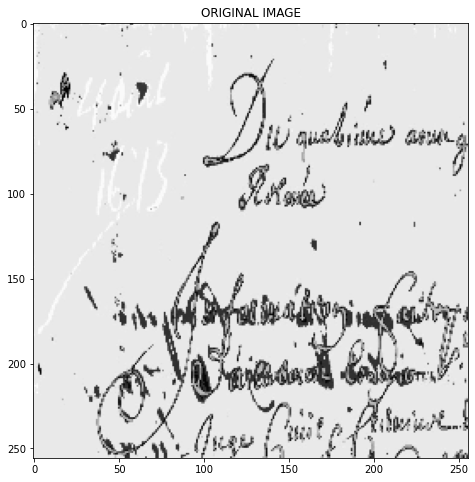

In [6]:

img = cv2.resize(img , [256,256])
            
plt.figure(figsize=(8,8))
plt.title("ORIGINAL IMAGE")
plt.imshow(img,cmap='gray')

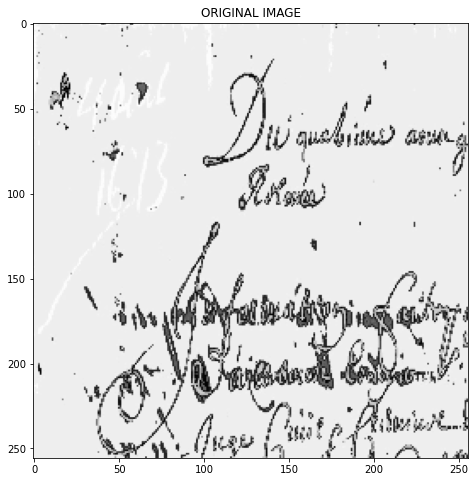

In [7]:
median = cv2.medianBlur(img,5)
# Apply Unsharp masking
unsharp_image = cv2.addWeighted(img, 2, median, -1, 0)


gauss = cv2.GaussianBlur(unsharp_image, (5,5), 0)
# Apply Unsharp masking
unsharp_image = cv2.addWeighted(unsharp_image, 2, gauss, -1, 0)

kernel = np.array([[0, -1, 0],
                   [-1, 7,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=unsharp_image, ddepth=-1, kernel=kernel)


img = cv2.addWeighted(image_sharp, 0.2, img, 0.8, 0)

plt.figure(figsize=(8,8))
plt.title("ORIGINAL IMAGE")
plt.imshow(img,cmap='gray')

In [8]:
kNumber = 10

flatArray = img.flatten()

centroids,_ = kmeansPlusPlusClustering(flatArray, kNumber)
print(centroids)

result = np.zeros(flatArray.shape)

classifications = {}

for i in range(kNumber):
          classifications[i] = []

for i in range(len(flatArray)):
            
    x = flatArray[i]
            
    distances = [np.linalg.norm(x - c) for c in centroids]
    classification = distances.index(min(distances))
    classifications[classification].append(x)
    result[i] = centroids[classification]

C:\Users\Dell\AppData\Local\Temp/ipykernel_13172/1467626987.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  return (p1 - p2)**2


K MEANS ++ FIRST STEP DONE


C:\Users\Dell\AppData\Local\Temp/ipykernel_13172/2215855988.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
  distances = [np.linalg.norm(x - c) for c in centroidsList]


Iteration %d done 0
Iteration %d done 1
Iteration %d done 2
Iteration %d done 3
Iteration %d done 4
Iteration %d done 5
Iteration %d done 6
Iteration %d done 7
Iteration %d done 8
Iteration %d done 9
Iteration %d done 10
Iteration %d done 11
Iteration %d done 12
Iteration %d done 13
Iteration %d done 14
Iteration %d done 15
Iteration %d done 16
Iteration %d done 17
Iteration %d done 18
Iteration %d done 19
[54.867193675889325, 221.31301408247012, 219.77558756633815, 217.31349206349208, 212.91329479768785, 205.2125, 191.94975845410627, 172.53954081632654, 138.07737226277374, 97.203125]


In [9]:

resultImg = result.reshape(img.shape).astype("uint8")

knnSegmentedImg = np.zeros([resultImg.shape[0],resultImg.shape[1]])

for i in range(resultImg.shape[0]):
    for k in range(resultImg.shape[1]):
                   
        for l in range(len(centroids)):
            
             if resultImg[i,k] == int(centroids[l]):
                knnSegmentedImg[i,k] = centroids[l]
     

In [10]:
resultImg.shape[0]

256

In [11]:
centroids = np.array(centroids)

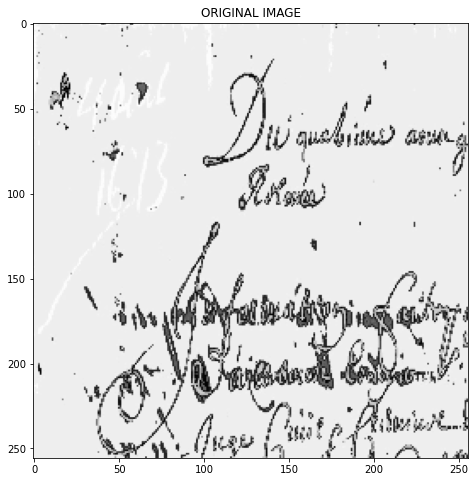

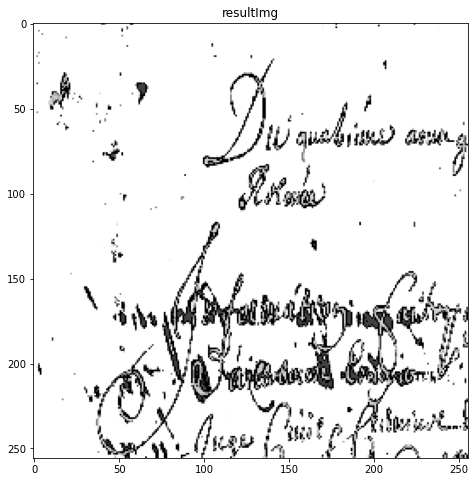

In [12]:
            
plt.figure(figsize=(8,8))
plt.title("ORIGINAL IMAGE")
plt.imshow(img,cmap='gray')

plt.figure(figsize=(8,8))
plt.title("resultImg")
plt.imshow(resultImg,cmap='gray')



In [13]:
# WE GOT CENTROIDS FROM KMEANS++ , NOW CALCULATE VARIANCES

varianceClusters = np.zeros([len(centroids),1])

for i in range(len(centroids)):
    
    dataPoints = np.array(classifications[i])
    
    mean = centroids[i]
    
    x = dataPoints - mean;
    
    var = (1/len(x))*np.dot(x.T,x)
    
    varianceClusters[i] = var

In [14]:
centroids

array([ 54.86719368, 221.31301408, 219.77558757, 217.31349206,
       212.9132948 , 205.2125    , 191.94975845, 172.53954082,
       138.07737226,  97.203125  ])

In [15]:
varianceClusters = varianceClusters + 1;

In [16]:
# ONCE VARIANCE AND CENTROIDS OBTAINED , GET WEIGHTING FACTORS FOR EACH NORMAL DISTRIBUTION CLUSTER

totalPixels = img.shape[0]*img.shape[1];


weightingFactors =  np.zeros([len(centroids),1])

for i in range(len(centroids)):
    
    numberPtsClusterWise = len(np.array(classifications[i]))
    
    weightingFactors[i] = numberPtsClusterWise/totalPixels;
    
    
    

In [17]:
print(weightingFactors)

print(np.sum(weightingFactors))

[[0.0579071 ]
 [0.84407043]
 [0.02012634]
 [0.00384521]
 [0.00305176]
 [0.00474548]
 [0.01611328]
 [0.0120697 ]
 [0.01118469]
 [0.02688599]]
1.0


In [18]:
def GaussianLikeliHood(mu,var,x):
    
    expVal = (x-mu)**2/(2*var);
    f = math.exp(-expVal);
    f = f/math.sqrt(2*math.pi*var);
    
    return f;
    
    

In [19]:


def GMM(totalPixels,centroids,weightingFactors,varianceClusters):
    
    iterations = 50;
    
    for iter in range(iterations):
    
    
        classificationsNew = {}
        for i in range(kNumber):
              classificationsNew[i] = []

        # initialise variables
        posteriorProb = np.zeros([len(centroids),totalPixels])
        weightingFactorsNew =  np.zeros([len(centroids),1])
        centroidsNew =  np.zeros([len(centroids),1])
        varianceClustersNew =  np.zeros([len(centroids),1])

        for i in range(len(flatArray)):
            
            # get pixel instensity value
            
            pixel = flatArray[i]

            # find likelihood for the pixel with respect to all K clusters
            for k in range(len(centroids)):
                   posteriorProb[k,i] = weightingFactors[k] * GaussianLikeliHood(centroids[k],varianceClusters[k],pixel)


                    
            # convert likelihood to posterior probability
            normalizationConst = np.sum(posteriorProb[:,i])
            posteriorProb[:,i] = posteriorProb[:,i]/normalizationConst
            
            
            # assign pixel to the the cluster where it gets highest posterior probability
            highestPosterior = np.argmax(posteriorProb[:,i])
            classificationsNew[highestPosterior].append(i)

        # now you have posterior probability for all pixels with their clusters
        # update parameters i.e mean , variance of clusters
            
        for k in range(len(centroids)):
            mean = np.dot(posteriorProb[k,:],flatArray)/np.sum(posteriorProb[k,:])
            centroidsNew[k] = mean

            wt = np.sum(posteriorProb[k,:])/(totalPixels)
            weightingFactorsNew[k] = wt

            x = np.square(flatArray - mean)

            var =  np.dot(posteriorProb[k,:],x)/np.sum(posteriorProb[k,:])
            varianceClustersNew[k] = var

        print("Iteration %d done",iter);
        
        
        
    return centroidsNew,weightingFactorsNew,varianceClustersNew,classificationsNew
    

In [20]:
centroidsNew,weightingFactorsNew,varianceClustersNew,classificationsNew = GMM(totalPixels,centroids,weightingFactors,varianceClusters)

Iteration %d done 0
Iteration %d done 1
Iteration %d done 2
Iteration %d done 3
Iteration %d done 4
Iteration %d done 5
Iteration %d done 6
Iteration %d done 7
Iteration %d done 8
Iteration %d done 9
Iteration %d done 10
Iteration %d done 11
Iteration %d done 12
Iteration %d done 13
Iteration %d done 14
Iteration %d done 15
Iteration %d done 16
Iteration %d done 17
Iteration %d done 18
Iteration %d done 19
Iteration %d done 20
Iteration %d done 21
Iteration %d done 22
Iteration %d done 23
Iteration %d done 24
Iteration %d done 25
Iteration %d done 26
Iteration %d done 27
Iteration %d done 28
Iteration %d done 29
Iteration %d done 30
Iteration %d done 31
Iteration %d done 32
Iteration %d done 33
Iteration %d done 34
Iteration %d done 35
Iteration %d done 36
Iteration %d done 37
Iteration %d done 38
Iteration %d done 39
Iteration %d done 40
Iteration %d done 41
Iteration %d done 42
Iteration %d done 43
Iteration %d done 44
Iteration %d done 45
Iteration %d done 46
Iteration %d done 47
It

In [21]:
centroidsNew

array([[ 55.44065368],
       [221.26681663],
       [220.91260083],
       [217.01151196],
       [212.23905969],
       [205.40941632],
       [192.16536576],
       [172.87703903],
       [137.30749238],
       [ 97.58722818]])

In [22]:
varianceClustersNew

array([[132.86540583],
       [  2.47794354],
       [  0.18957645],
       [  3.7342463 ],
       [  2.89704942],
       [ 12.46780902],
       [ 18.36998797],
       [ 59.59695862],
       [189.13145003],
       [155.93910731]])

In [23]:
# segmentation based on GMM
classificatnCnt = len(classificationsNew)
flatArrayNew = flatArray.copy()

for k in range(classificatnCnt):
    
    classificationK = classificationsNew[k];
    
    for i in classificationK:
        
        pixelLocatn = i;
        flatArrayNew[pixelLocatn] = int(centroids[k]);
    

    

In [24]:
GMM1SegmentedImg = flatArrayNew.reshape(img.shape).astype("uint8")

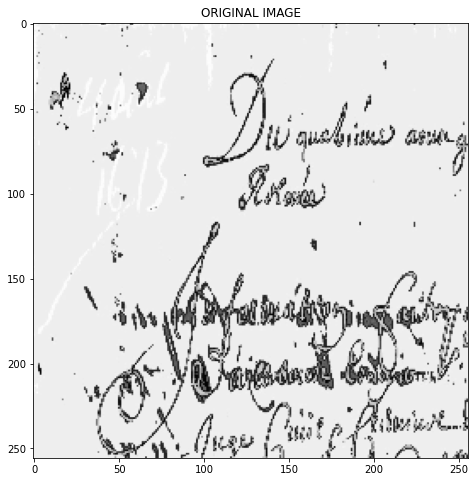

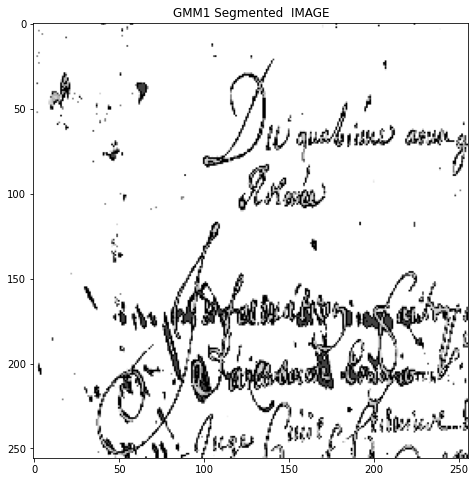

In [25]:
plt.figure(figsize=(8,8))
plt.title("ORIGINAL IMAGE")
plt.imshow(img,cmap='gray')

plt.figure(figsize=(8,8))
plt.title("GMM1 Segmented  IMAGE")
plt.imshow(GMM1SegmentedImg , cmap='gray')

In [26]:
for k in range(len(classificationsNew)):
    print(len(classificationsNew[k]))


3896
56918
0
0
143
301
1054
784
712
1728


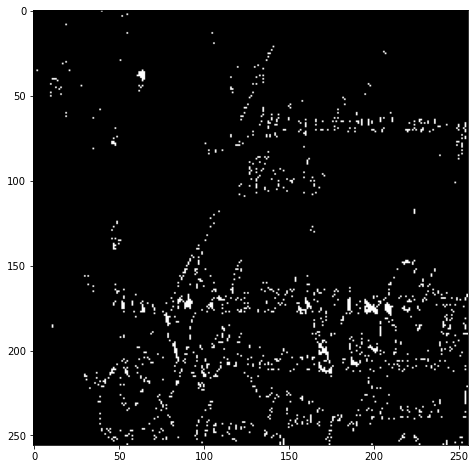

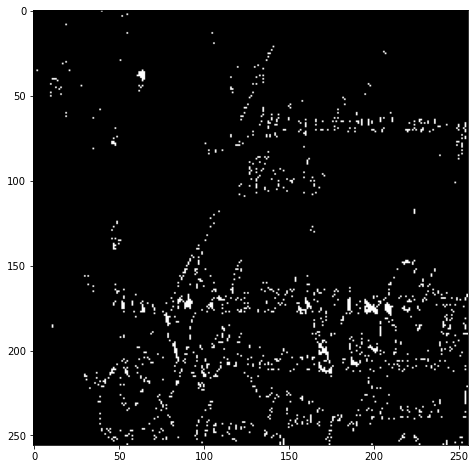

In [27]:
k = 9

flatArray1 = np.zeros(flatArray.shape)

for i in classificationsNew[k]:
     flatArray1[i] = 1;

flatArray1 = flatArray1    
flatArray1 = flatArray1.reshape(img.shape).astype(np.uint8)

plt.figure(figsize=(8,8))
plt.imshow(flatArray1,cmap = 'gray')
    
k = 3

flatArray2 = np.zeros(flatArray.shape)

for i in classificationsNew[k]:
     flatArray2[i] = 1;

flatArray2 = flatArray2    
flatArray2 = flatArray2.reshape(img.shape).astype(np.uint8)

plt.figure(figsize=(8,8))
plt.imshow(flatArray1 + flatArray2,cmap = 'gray')

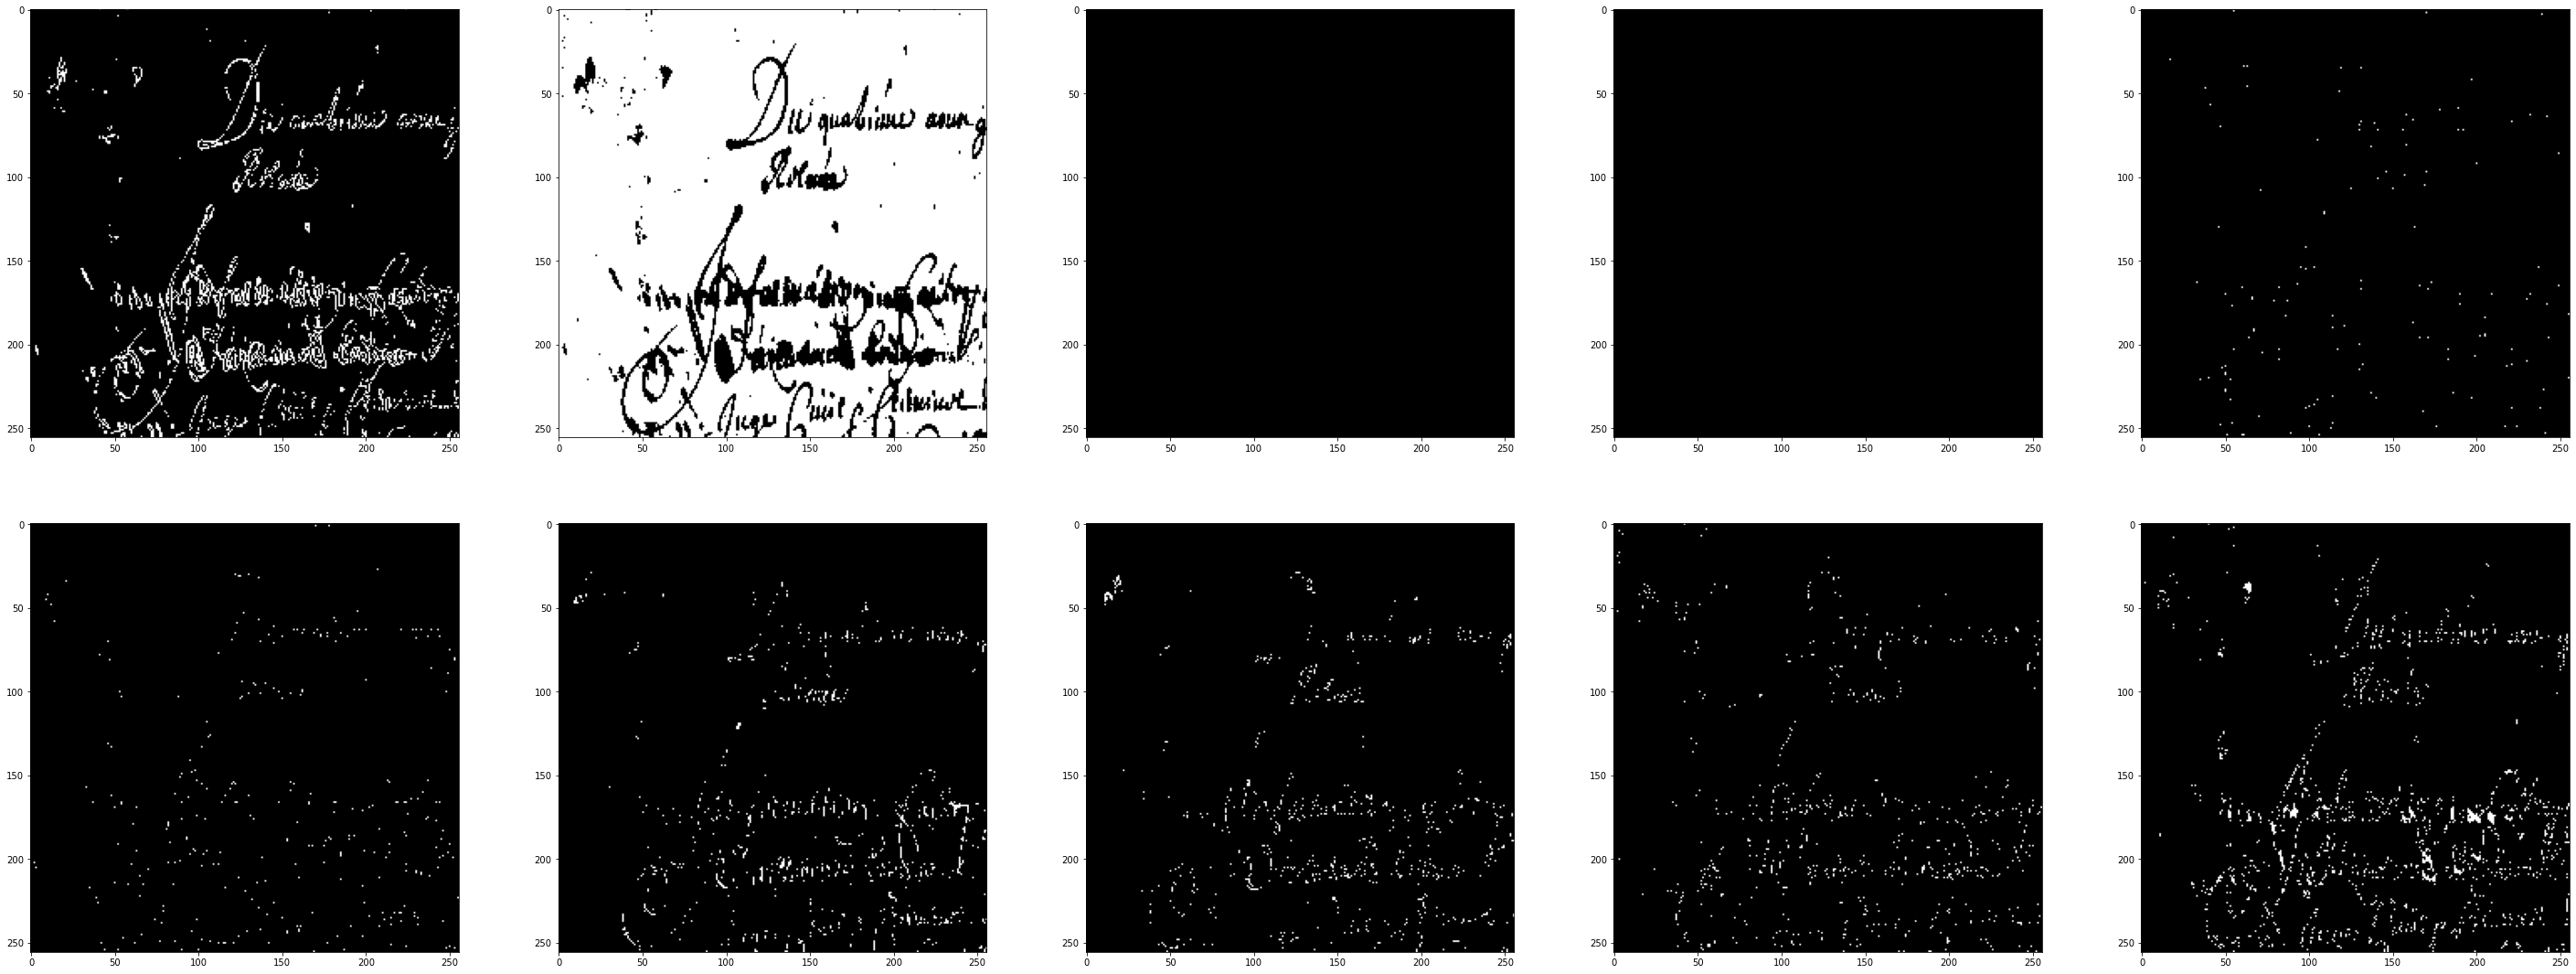

In [28]:

classificationResultGMM1 = classificationsNew.copy()

w = 10
h = 10
fig = plt.figure(figsize=(50, 50))
columns = 5
rows = 5

#----------------------------------------------------------------------

for k in range(len(classificationResultGMM1)):

    flatArray1 = np.zeros(flatArray.shape)


    for i in classificationResultGMM1[k]:
        flatArray1[i] = 1;

    flatArray1 = flatArray1    
    flatArray1 = flatArray1.reshape(img.shape).astype(np.uint8)
    
    fig.add_subplot(rows, columns, k+1)
    plt.imshow(flatArray1,cmap = 'gray')
    
    
    
plt.show()

#----------------------------------------------------------------------






In [29]:
centroidsNew

array([[ 55.44065368],
       [221.26681663],
       [220.91260083],
       [217.01151196],
       [212.23905969],
       [205.40941632],
       [192.16536576],
       [172.87703903],
       [137.30749238],
       [ 97.58722818]])

# REMOVING NOISY CLUSTERS

In [30]:


rejectedClusterList = np.array([4,5,7])

for i in rejectedClusterList:
    
    
    centroidsNew = np.delete(centroidsNew,i)
    
    varianceClustersNew = np.delete(varianceClustersNew,i)
    
    weightingFactorsNew = np.delete(weightingFactorsNew,i)
    
    classificationsNew[i] = []


    
    

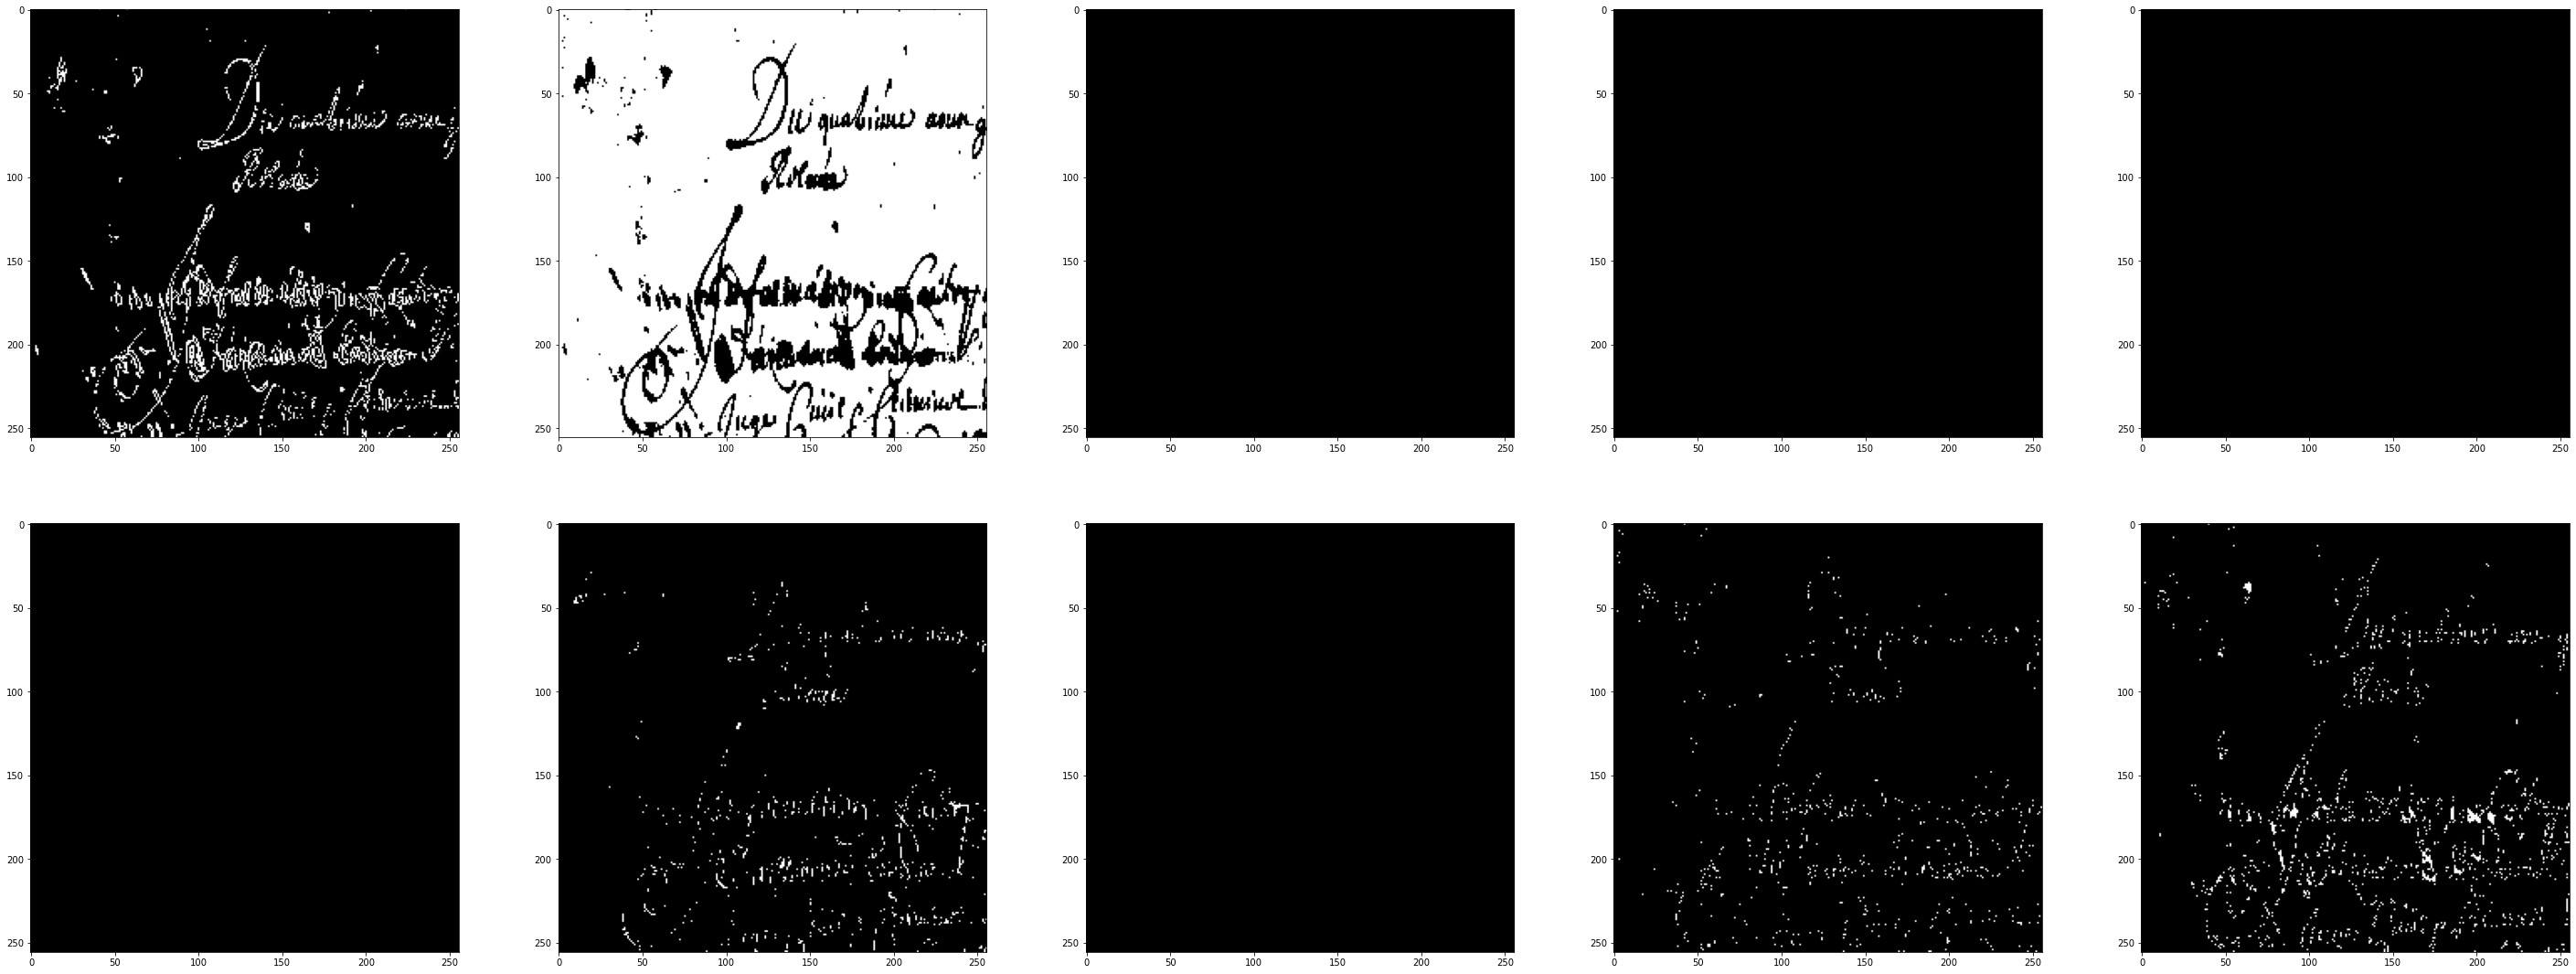

In [31]:
w = 10
h = 10
fig = plt.figure(figsize=(50, 50))
columns = 5
rows = 5


for k in range(len(classificationsNew)):

    flatArray1 = np.zeros(flatArray.shape)


    for i in classificationsNew[k]:
        flatArray1[i] = 1;

    flatArray1 = flatArray1    
    flatArray1 = flatArray1.reshape(img.shape).astype(np.uint8)
    
    fig.add_subplot(rows, columns, k+1)
    plt.imshow(flatArray1,cmap = 'gray')
    
    
    
plt.show()

In [32]:
centroidsNew,weightingFactorsNew,varianceClustersNew,classificationsNew = GMM(totalPixels,centroidsNew,weightingFactorsNew,varianceClustersNew)

Iteration %d done 0
Iteration %d done 1
Iteration %d done 2
Iteration %d done 3
Iteration %d done 4
Iteration %d done 5
Iteration %d done 6
Iteration %d done 7
Iteration %d done 8
Iteration %d done 9
Iteration %d done 10
Iteration %d done 11
Iteration %d done 12
Iteration %d done 13
Iteration %d done 14
Iteration %d done 15
Iteration %d done 16
Iteration %d done 17
Iteration %d done 18
Iteration %d done 19
Iteration %d done 20
Iteration %d done 21
Iteration %d done 22
Iteration %d done 23
Iteration %d done 24
Iteration %d done 25
Iteration %d done 26
Iteration %d done 27
Iteration %d done 28
Iteration %d done 29
Iteration %d done 30
Iteration %d done 31
Iteration %d done 32
Iteration %d done 33
Iteration %d done 34
Iteration %d done 35
Iteration %d done 36
Iteration %d done 37
Iteration %d done 38
Iteration %d done 39
Iteration %d done 40
Iteration %d done 41
Iteration %d done 42
Iteration %d done 43
Iteration %d done 44
Iteration %d done 45
Iteration %d done 46
Iteration %d done 47
It

In [33]:
centroidsNew

array([[ 60.91144325],
       [221.27258038],
       [220.99901735],
       [214.77477854],
       [203.72055362],
       [181.8989254 ],
       [121.15811731]])

In [34]:
varianceClustersNew

array([[2.60448009e+02],
       [2.56112199e+00],
       [5.60133875e-03],
       [4.20506445e+00],
       [3.81837819e+01],
       [1.17861678e+02],
       [4.54789441e+02]])

In [35]:
# segmentation based on GMM 2
classificatnCnt = len(classificationsNew)
flatArrayNew = flatArray.copy()

for k in range(classificatnCnt):
    
    classificationK = classificationsNew[k];
    
    for i in classificationK:
        
        pixelLocatn = i;
        flatArrayNew[pixelLocatn] = int(centroids[k]);

In [36]:
GMM2SegmentedImg = flatArrayNew.reshape(img.shape).astype("uint8")

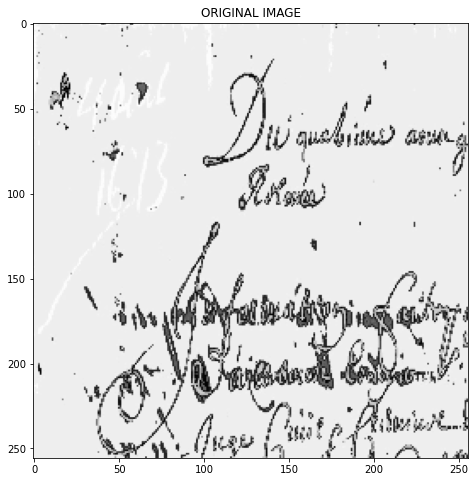

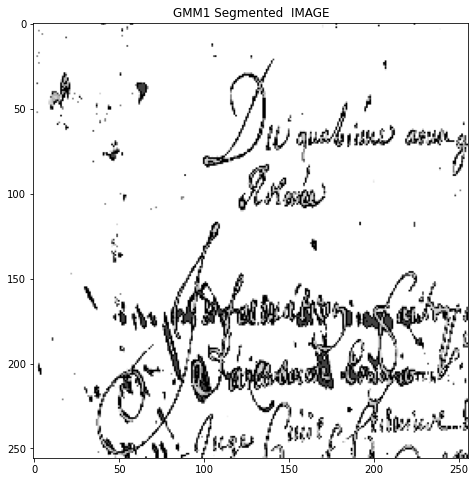

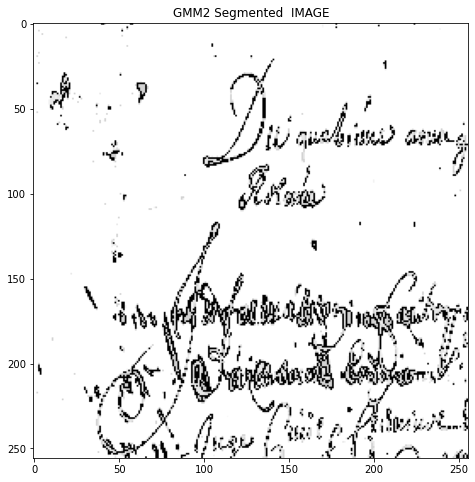

In [37]:
plt.figure(figsize=(8,8))
plt.title("ORIGINAL IMAGE")
plt.imshow(img,cmap='gray')

plt.figure(figsize=(8,8))
plt.title("GMM1 Segmented  IMAGE")
plt.imshow(GMM1SegmentedImg,cmap='gray')

plt.figure(figsize=(8,8))
plt.title("GMM2 Segmented  IMAGE")
plt.imshow(GMM2SegmentedImg,cmap='gray')

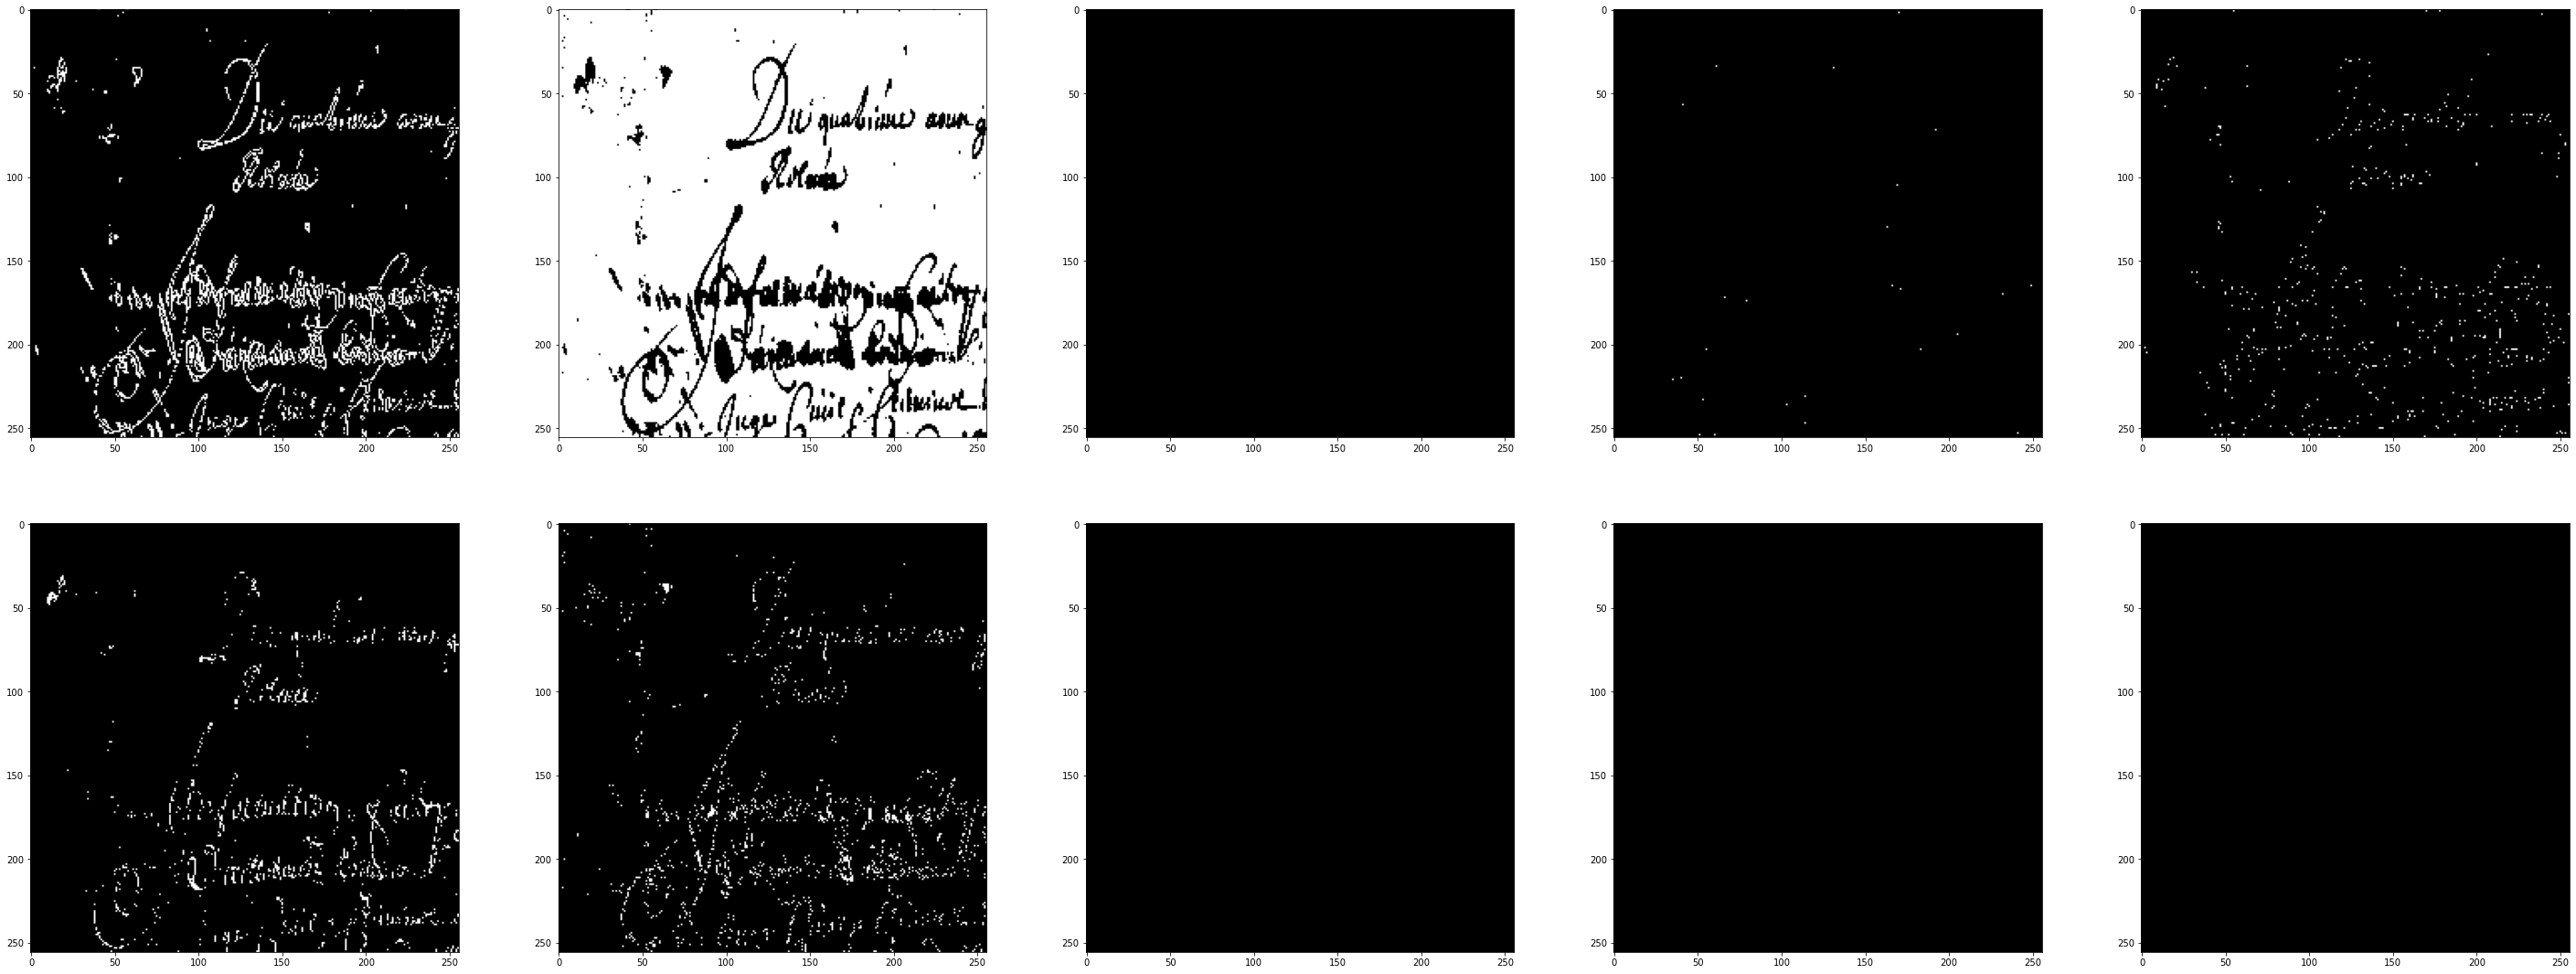

In [38]:

classificationResultGMM2 = classificationsNew.copy()

w = 10
h = 10
fig = plt.figure(figsize=(50, 50))
columns = 5
rows = 5

#----------------------------------------------------------------------

for k in range(len(classificationResultGMM2)):

    flatArray1 = np.zeros(flatArray.shape)


    for i in classificationResultGMM2[k]:
        flatArray1[i] = 1;

    flatArray1 = flatArray1    
    flatArray1 = flatArray1.reshape(img.shape).astype(np.uint8)
    
    fig.add_subplot(rows, columns, k+1)
    plt.imshow(flatArray1,cmap = 'gray')
    
    
    
plt.show()

#----------------------------------------------------------------------


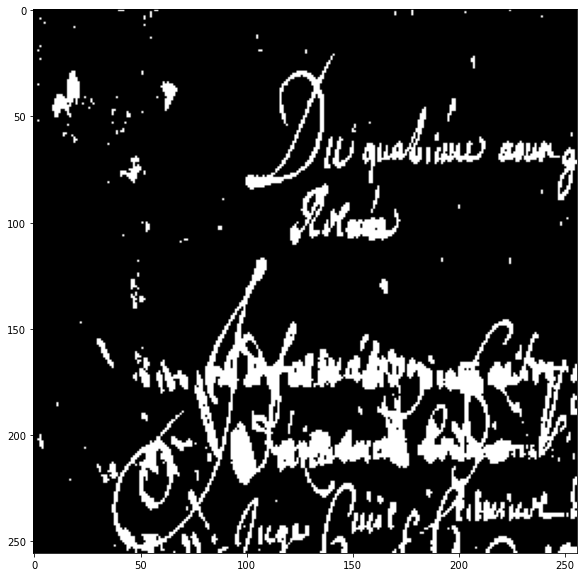

In [39]:
flatArray1 = np.zeros(flatArray.shape)


for i in classificationResultGMM1[1]:
    flatArray1[i] = 1;

flatArray1 = flatArray1    
flatArray1 = flatArray1.reshape(img.shape).astype(np.uint8)
      
flatArray1 = 255 - flatArray1    
    
plt.figure(figsize=(10,10))
plt.imshow(flatArray1,cmap = 'gray')

      

In [55]:
res = flatArray1
    

In [56]:
res = res > 254


In [57]:
outputFinal = np.ones([img.shape[0],img.shape[1],3])

outputFinal[:,:,0] = res.astype(np.uint8)


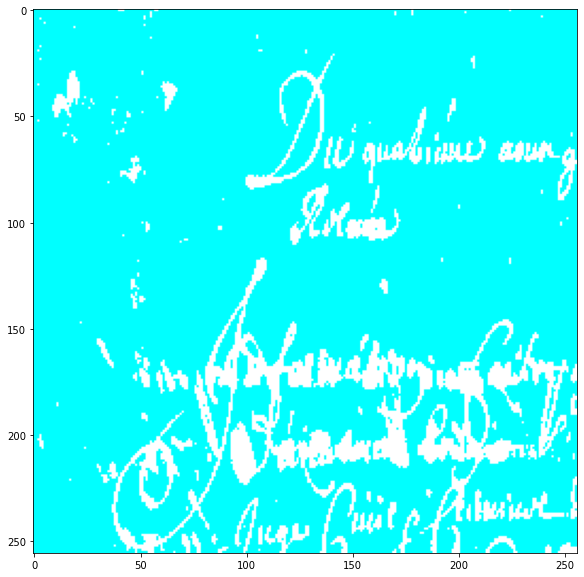

In [58]:
plt.figure(figsize=(10,10))
plt.imshow(outputFinal)